# AI Fall 2022 - A4 - Decision Tree
## Your info

**Student Name:** _Shahed Razavi_

**Student Id:** _99104627_

## Practical Question - Decision Tree (25 + 5 points)
In this question you will first write a program to find an appropriate order of features for training a decision tree based on information gain. In the second part, you will use existing implementations to train and tune a classifier using GridSearch on the given dataset. And try to finish this in <15 mins.

### Import
Import the libraries you need in the next cell.

In [158]:
import pandas as pd
import math
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
# ...

### Part A (20 points)
Consider the following dataframe and answer the following questions:

In [159]:
    df = pd.DataFrame({
        'Race': [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        'Sex': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
        'Age': [43.0, 72.0, 4.0, 59.0, 34.0, 55.0, 41.0, 39.0, 6.0, 77.0, 67.0, 35.0, 45.0, 39.0, 32.0, 57.0, 99.0, 68.0, 47.0, 28.0],
        'BMI': [25.803, 33.394, 20.278, 32.918, 30.743, 37.734, 23.725, 20.722, 19.452, 22.044, 17.481, 18.918, 28.578, 19.214, 23.562, 23.446, 21.872, 20.691, 25.471, 25.82],
        'Smoker': [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
        'Label': [False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False],
    })

df.head()

,Race,Sex,Age,BMI,Smoker,Label
0,1.0,1.0,43.0,25.803,1.0,False
1,2.0,2.0,72.0,33.394,0.0,True
2,1.0,2.0,4.0,20.278,1.0,False
3,1.0,2.0,59.0,32.918,0.0,False
4,1.0,2.0,34.0,30.743,1.0,False


#### QA.1 (10 points)
Complete the following function that calculates and returns the list of features based on their information gain.

In [160]:
def feature_order(X_data, y_data):
    '''
    Calculate the best feature order
    for training a decision tree based on
    information gain.
    Input:
        X_data (pd.DataFrame) contains data features
        y_data (pd.Series) contains the labels
    Output:
        order (list[str]): The `X_data` columns in the correct order
    '''
    rows, cols = df.shape

    entropy = []

    for feature in X_data:
        # print(feature)
        be = math.inf
        for val in df.loc[:, feature]:

            sec1 = df[df[feature] >= val]
            sec2 = df[df[feature] < val]

            n1 = sec1.shape[0]
            n2 = rows - n1



            # if feature == "Age":
            #     print("n1: ", n1)
            #     print("n2: ", n2)
            #     print(val)
            #     print(sec1)
            #     print(sec2)

            pl1 = sec1.Label.sum()
            pl2 = n1 - pl1

            pl3 = sec2.Label.sum()
            pl4 = n2 - pl3

            # if feature == "Age":
            #     print("pl1: ", pl1)
            #     print("pl2: ", pl2)
            #     print("pl3: ", pl3)
            #     print("pl4: ", pl4)


            sum1 = 0
            if (pl1 != 0):
                sum1 += (pl1/n1) * math.log((pl1/n1), 2)
            if (pl2 != 0):
                sum1 += (pl2/n1) * math.log((pl2/n1), 2)
            sum2 = 0
            if (pl3 != 0):
                sum2 += (pl3/n2) * math.log((pl3/n2), 2)
            if (pl4 != 0):
                sum2 += (pl4/n2) * math.log((pl4/n2), 2)

            ent = - (n1/rows*sum1 + n2/rows*sum2)
            if ent < be:
                be = ent

        entropy.append(be)


    # print(entropy)

    order = [x for _, x in sorted(zip(entropy, X_data))]
    # print(order)
    return order

#     pieces = [X_data, y_data]
#     result = pd.concat(pieces,axis=1)
#     result.head()
    
    
    
#     return order


feature_order(df.columns[:-1], df.Label)

['Age', 'BMI', 'Race', 'Smoker', 'Sex']

#### QA.2 (5 points)
What are some of the effective approaches to prevent the tree from overfitting? (three approaches)

<font color=#183364>
    <i>
        Answer.
        <ol>
            <li>نخست درخت را به طور کامل می‌سازیم و سپس از پایین با استفاده از تست آماره chi بررسی می‌کنیم که آیا با هرس کردن آن زیردرخت یا شاخه عملکرد درخت بهتر می‌شود یا خیر و در صورت بهتر شدن هرس می‌کنیم.</li>
            <li>می‌توانیم برای عمق درخت یک کران بالا قرار دهیم که درخت از یک حدی بیشتر عمیق‌تر نشود.</li>
            <li>می‌توانیم برای تعداد سمپل‌های حاضر در هر نود برگ درخت، یک کران پایین بگذاریم که حداقل از آن مقدار تعداد سمپل‌ها در هر برگ بیشتر باشد.</li>
        </ol>
    </i>
</font>

#### QA.3 (5 points)
About the `Age` feature which is an integer-valued input attribute, how can a tree utilize it for classification? Write a small piece of code to find the answer for this specific column.

<font color=#183364>
    <i>
        Answer.
    </i>
</font>

In [162]:
# Your code here
rows, cols = df.shape
bent = math.inf
bval = 0
for val in df.loc[:, "Age"]:

    sec1 = df[df["Age"] >= val]
    sec2 = df[df["Age"] < val]

    n1 = sec1.shape[0]
    n2 = rows - n1

    pl1 = sec1.Label.sum()
    pl2 = n1 - pl1

    pl3 = sec2.Label.sum()
    pl4 = n2 - pl3


    sum1 = 0
    if (pl1 != 0):
        sum1 += (pl1 / n1) * math.log((pl1 / n1), 2)
    if (pl2 != 0):
        sum1 += (pl2 / n1) * math.log((pl2 / n1), 2)
    sum2 = 0
    if (pl3 != 0):
        sum2 += (pl3 / n2) * math.log((pl3 / n2), 2)
    if (pl4 != 0):
        sum2 += (pl4 / n2) * math.log((pl4 / n2), 2)

    ent = - (n1 / rows * sum1 + n2 / rows * sum2)
    if ent < bent:
        bent = ent
        bval = val

print("Best(Least) entropy: ",bent)
print("Best value for dividing: ",bval)

Best(Least) entropy:  0.4459842269272
Best value for dividing:  47.0


### Part B (10 points)
In this part you will learn more about [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and use it to train a classifier and tune its parameters.

#### QB.1 (5 points)
For measuring the _accuracy_ of your models, choose a subset of the given dataset as your validation set (Check out [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [167]:
# Your code here
## Split the dataset
y = df.loc[:, "Label"]
X = df.iloc[:, :5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    Race  Sex   Age     BMI  Smoker
17   1.0  1.0  68.0  20.691     0.0
19   1.0  2.0  28.0  25.820     1.0
16   1.0  2.0  99.0  21.872     0.0
8    1.0  1.0   6.0  19.452     0.0
1    2.0  2.0  72.0  33.394     0.0
5    1.0  2.0  55.0  37.734     1.0
6    1.0  2.0  41.0  23.725     0.0
14   1.0  1.0  32.0  23.562     0.0
3    1.0  2.0  59.0  32.918     0.0
11   1.0  2.0  35.0  18.918     1.0
12   2.0  1.0  45.0  28.578     1.0
2    1.0  2.0   4.0  20.278     1.0
18   1.0  1.0  47.0  25.471     0.0
    Race  Sex   Age     BMI  Smoker
4    1.0  2.0  34.0  30.743     1.0
10   1.0  1.0  67.0  17.481     0.0
13   1.0  2.0  39.0  19.214     0.0
9    1.0  1.0  77.0  22.044     1.0
7    1.0  2.0  39.0  20.722     1.0
0    1.0  1.0  43.0  25.803     1.0
15   1.0  1.0  57.0  23.446     0.0
17    False
19    False
16    False
8     False
1      True
5      True
6     False
14    False
3     False
11    False
12    False
2     False
18     True
Name: Label, dtype: bool
4     False
10     True
13 

Score:  0.8571428571428571


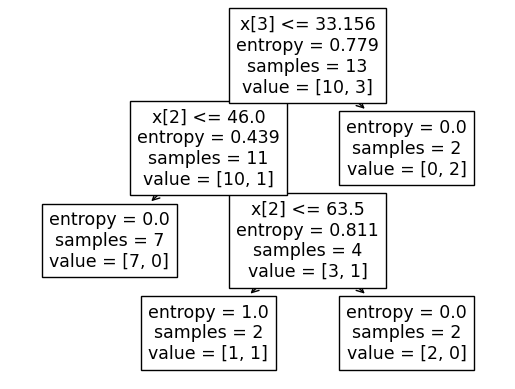

In [168]:
# Your code here
## Set your own hyperparameters below, such as:
dt_hyperparams = {
    'min_samples_split': 4,
    'criterion': 'entropy',
    'max_depth': 3,
    'min_samples_leaf': 2,
    'max_leaf_nodes': 5,
    'splitter': 'best',
}

## Train the model and check its performance
t = tree.DecisionTreeClassifier()
t = t.set_params(**dt_hyperparams)
t = t.fit(X_train, y_train)
predictions = t.predict(X_test)

tree.plot_tree(t)

print("Score: ",metrics.accuracy_score(y_test, predictions))

#### QB.2 (5 points)
Take a look at customizable and potentially useful input params of the model, define a range for each of their values, and use GridSearch (Feel free to implement/[import](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) it) and find a set of hyperparametetrs that work best among your candidates.

In [169]:
# Your code here
parameters = {'min_samples_split'    : [1,2,3,4],
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [1,2,3,4,None],
    'min_samples_leaf': [1,2,3,4],
    'max_leaf_nodes': [2,3,4,5],
}
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = parameters, cv = 2, n_jobs=-1, refit=True)
grid.fit(X_train, y_train)
prediction = grid.predict(X_test)
best=grid.best_estimator_
best_prediction = best.predict(X_test)
print("Best Score: ", metrics.accuracy_score(y_test, best_prediction))
print("Params for Best Score: ", grid.best_params_)

Best Score:  0.8571428571428571
Params for Best Score:  {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 4, 'min_samples_split': 1}


#### QB.3 (5 extra points)
Visualize the tree splits and interpret it (Hint: Search about `IPython.display.Image`, `pydotplus`, `StringIO`, and `export_graphviz`).

[Text(0.6, 0.875, 'BMI <= 33.156\nentropy = 0.779\nsamples = 13\nvalue = [10, 3]\nclass = 0'),
 Text(0.4, 0.625, 'Age <= 46.0\nentropy = 0.439\nsamples = 11\nvalue = [10, 1]\nclass = 0'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = 0'),
 Text(0.6, 0.375, 'Age <= 63.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(0.4, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1')]

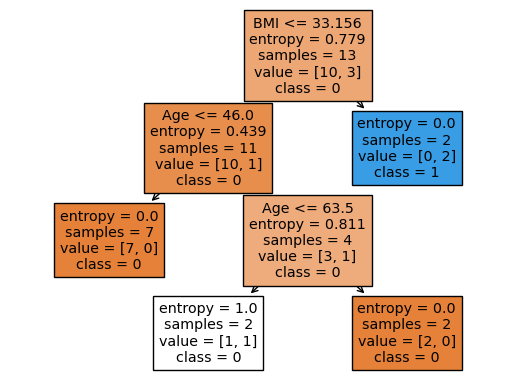

In [171]:
tree.plot_tree(t, feature_names=df.columns[:-1], class_names=['0', '1'], filled=True)